# EDA LAB
The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at: https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from: https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:

Download a small (5-15) set of variables of interest.
Write a short description of the data you chose, and why. (1 page)
Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
Produce some numeric summaries and visualizations. (1-3 pages)
Describe your findings in 1-2 pages.
If you have other content that you think absolutely must be included, you can include it in an appendix of any length.
For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [12]:
# 1. Download a small (5-15) set of variables of interest.

import pandas as pd

# List of variables you want to save
var_list = ['polviews', 'relig', 'attend', 'gunlaw', 'grass', 'abany']

# Name of the file you want to save the data to
output_filename = 'selected_gss_data.csv'

phase = 0  # Starts in write mode; after one iteration of loop, switches to append mode

for k in range(3):  # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1 + k) + '.parquet'  # Create URL to the chunk to be processed
    print(url)  # Check the URL is correct
    df = pd.read_parquet(url)  # Download this chunk of data
    print(df.head())  # Visually inspect the first few rows

    if phase == 0:
        df.loc[:, var_list].to_csv(
            output_filename,  # Specifies target file to save the chunk to
            mode='w',  # Write mode
            header=var_list,  # Variable names
            index=False  # No row index saved
        )
        phase = 1  # Switch to append mode
    elif phase == 1:
        df.loc[:, var_list].to_csv(
            output_filename,  # Specifies target file to save the chunk to
            mode='a',  # Append mode
            header=None,  # No header in append mode
            index=False  # No row index saved
        )

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

2. Write a short description of the data you chose, and why. 

For this EDA lab, I chose to focus on the relationship between political views, religious affiliation, and opinions on controversial social issues using data from the General Social Survey (GSS). The GSS is a comprehensive, bi-annual, nationally representative survey of American adults that has been conducted since 1972. It provides valuable insights into the social, political, and cultural attitudes of the American public. For this analysis, I selected a subset of six variables from the GSS dataset that align with the theme of politics, religion, and social attitudes:

POLVIEWS – Political views, measured on a scale from extremely liberal to extremely conservative.

RELIG – Religious affiliation, which captures the respondent’s self-reported religion.

ATTEND – Frequency of attendance at religious services.

GUNLAW – Opinion on whether laws covering the sale of firearms should be made more strict.

GRASS – Opinion on whether marijuana should be legalized.

ABANY – Opinion on whether abortion should be legal under any circumstances.

I chose these variables because they allow for an investigation into how political ideology and religious commitment shape individuals’ perspectives on contentious social issues. Political and religious affiliations often serve as key predictors of opinions on policies related to gun control, drug legalization, and reproductive rights. Understanding these relationships can provide insights into the broader cultural and ideological divides in American society.

The POLVIEWS variable offers a self-reported measure of political ideology, ranging from extremely liberal to extremely conservative. This scale provides a way to gauge how political orientation correlates with stances on social policies. The RELIG and ATTEND variables enable an exploration of how religious identity and the frequency of religious practice influence respondents' views. Prior research suggests that religiosity often aligns with conservative positions on social issues; thus, including both religious affiliation and attendance frequency can help assess the extent of this relationship.

The variables GUNLAW, GRASS, and ABANY represent highly debated topics in American political discourse. Gun control remains a deeply polarizing issue, with support for stricter laws often aligning with liberal views. Marijuana legalization has seen increasing support over the past few decades, but attitudes toward drug policy reform can vary significantly based on political and religious perspectives. Abortion rights have long been a flashpoint in American politics, and opinions on abortion often reflect a complex interplay of political, religious, and personal beliefs.

By selecting these variables, I aim to uncover patterns and relationships between political ideology, religious commitment, and attitudes toward gun control, drug legalization, and abortion rights. This analysis will contribute to a better understanding of how core values and belief systems shape public opinion on critical social issues in the United States.

Initial Data Overview:
  polviews       relig                      attend gunlaw grass abany
0      NaN      jewish  about once or twice a year  favor   NaN   NaN
1      NaN    catholic                  every week  favor   NaN   NaN
2      NaN  protestant          about once a month  favor   NaN   NaN
3      NaN       other                       never  favor   NaN   NaN
4      NaN  protestant                       never  favor   NaN   NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72390 entries, 0 to 72389
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   polviews  62718 non-null  object
 1   relig     71953 non-null  object
 2   attend    71690 non-null  object
 3   gunlaw    48307 non-null  object
 4   grass     38669 non-null  object
 5   abany     39258 non-null  object
dtypes: object(6)
memory usage: 3.3+ MB
None

Missing Values:
polviews     9672
relig         437
attend        700
gunlaw      24083
grass      

/var/folders/nd/r48_9n593wlg71hh29nd29100000gn/T/ipykernel_98199/2619356186.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[categorical_vars] = df_cleaned[categorical_vars].astype('category')


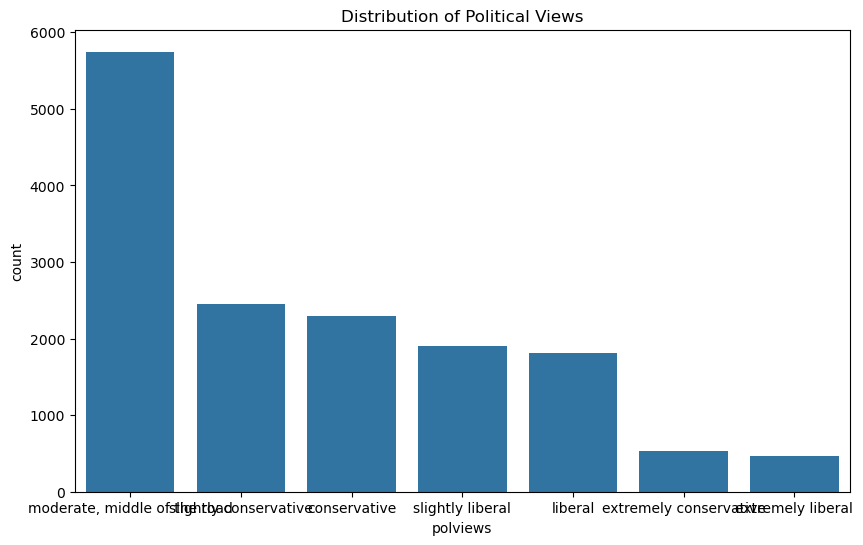

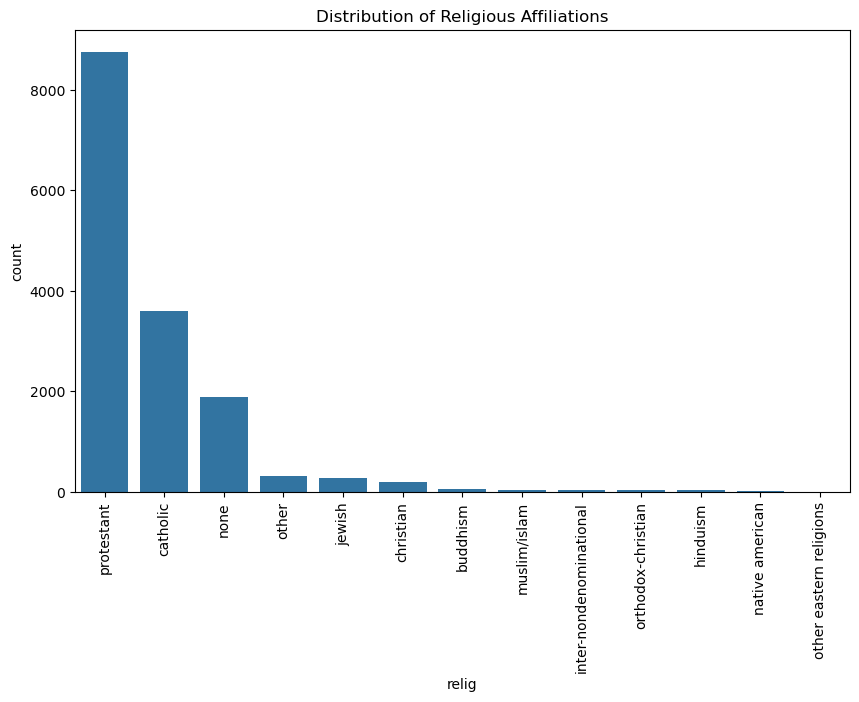

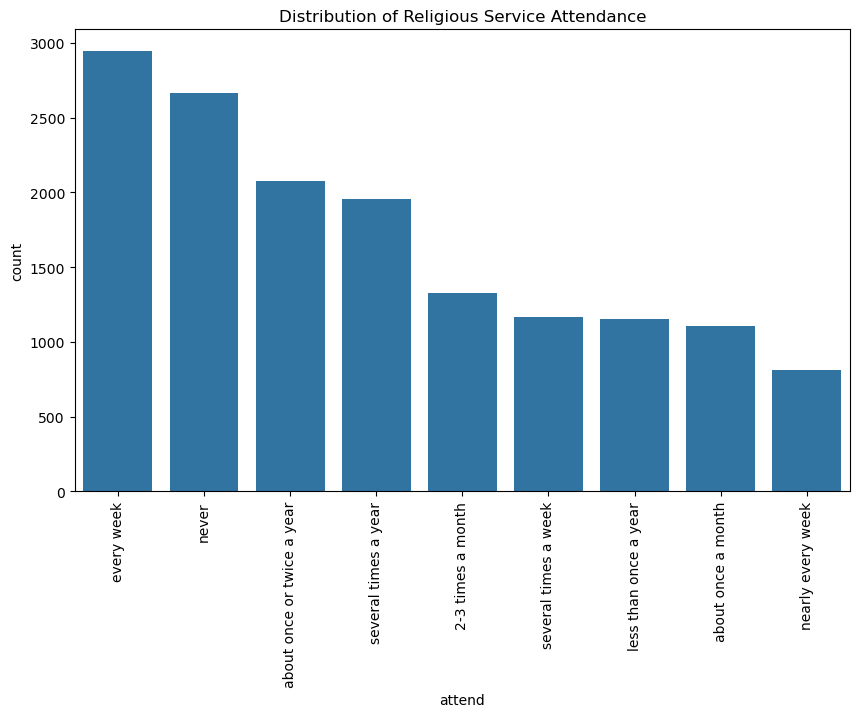

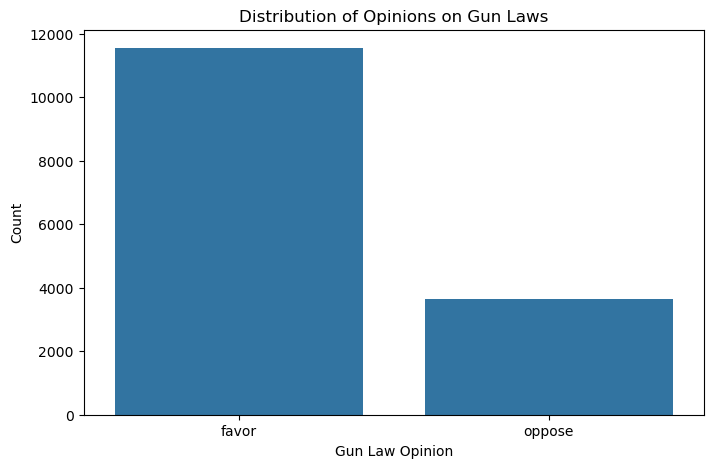

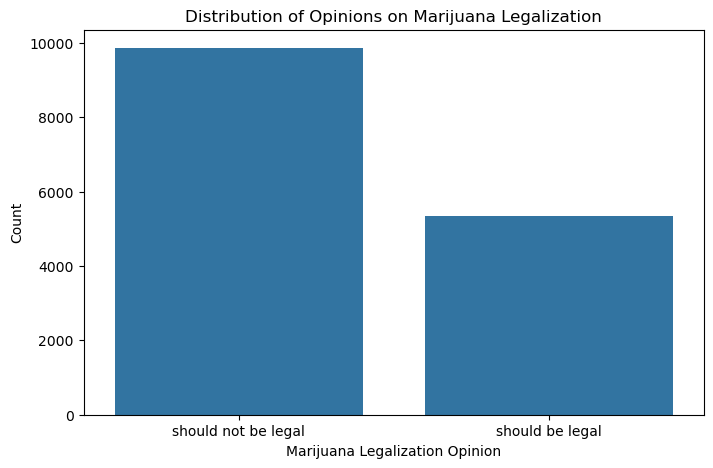

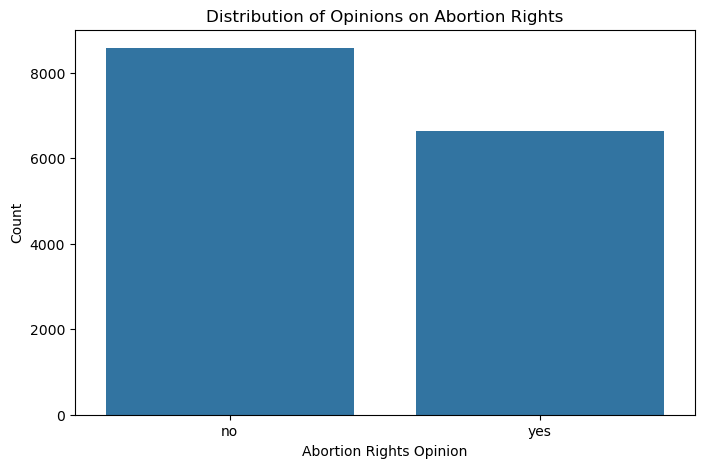

Data cleaning complete. Cleaned data saved to 'cleaned_gss_data.csv'.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'selected_gss_data.csv'
df = pd.read_csv(file_path)

# Display initial data overview
# This gives us a quick look at the first few rows and data types to understand what we are working with
print("Initial Data Overview:")
print(df.head())
print(df.info())

# Check for missing values
# Missing values are common in survey data; identifying them is the first step towards cleaning
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values - Drop rows with missing data for simplicity
# Since this is an exploratory analysis, dropping missing rows is a simple approach to ensure clean data
# More sophisticated handling could involve imputation if needed later
df_cleaned = df.dropna()

print("\nData Overview After Dropping Missing Values:")
print(df_cleaned.info())

# Convert categorical variables to appropriate data types
# These variables represent categories (e.g., political views, religious affiliation), so converting them
# to categorical type will help with analysis and visualization
categorical_vars = ['polviews', 'relig', 'attend', 'gunlaw', 'grass', 'abany']
df_cleaned[categorical_vars] = df_cleaned[categorical_vars].astype('category')

# Display summary statistics for categorical variables
# Checking value counts gives us an understanding of the distribution of each categorical variable
print("\nSummary Statistics for Categorical Variables:")
for var in categorical_vars:
    print(f"\n{var}:")
    print(df_cleaned[var].value_counts())

# Visualize distributions
# Visualizing the distribution of each variable helps to identify patterns and potential imbalances
plt.figure(figsize=(10, 6))
sns.countplot(x='polviews', data=df_cleaned, order=df_cleaned['polviews'].value_counts().index)
plt.title('Distribution of Political Views')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='relig', data=df_cleaned, order=df_cleaned['relig'].value_counts().index)
plt.title('Distribution of Religious Affiliations')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='attend', data=df_cleaned, order=df_cleaned['attend'].value_counts().index)
plt.title('Distribution of Religious Service Attendance')
plt.xticks(rotation=90)
plt.show()

# Visualize Gun Law Opinions
plt.figure(figsize=(8, 5))
sns.countplot(x='gunlaw', data=df_cleaned, order=df_cleaned['gunlaw'].value_counts().index)
plt.title('Distribution of Opinions on Gun Laws')
plt.xlabel('Gun Law Opinion')
plt.ylabel('Count')
plt.show()

# Visualize Marijuana Legalization Opinions
plt.figure(figsize=(8, 5))
sns.countplot(x='grass', data=df_cleaned, order=df_cleaned['grass'].value_counts().index)
plt.title('Distribution of Opinions on Marijuana Legalization')
plt.xlabel('Marijuana Legalization Opinion')
plt.ylabel('Count')
plt.show()

# Visualize Abortion Rights Opinions
plt.figure(figsize=(8, 5))
sns.countplot(x='abany', data=df_cleaned, order=df_cleaned['abany'].value_counts().index)
plt.title('Distribution of Opinions on Abortion Rights')
plt.xlabel('Abortion Rights Opinion')
plt.ylabel('Count')
plt.show()

# Save the cleaned data to a new CSV file
# Saving the cleaned data allows us to easily reuse it in further analysis steps
df_cleaned.to_csv('cleaned_gss_data.csv', index=False)

print("Data cleaning complete. Cleaned data saved to 'cleaned_gss_data.csv'.")

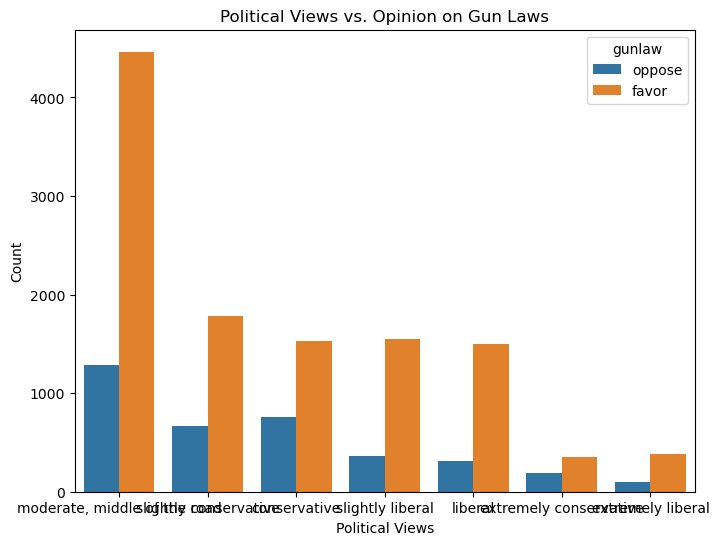

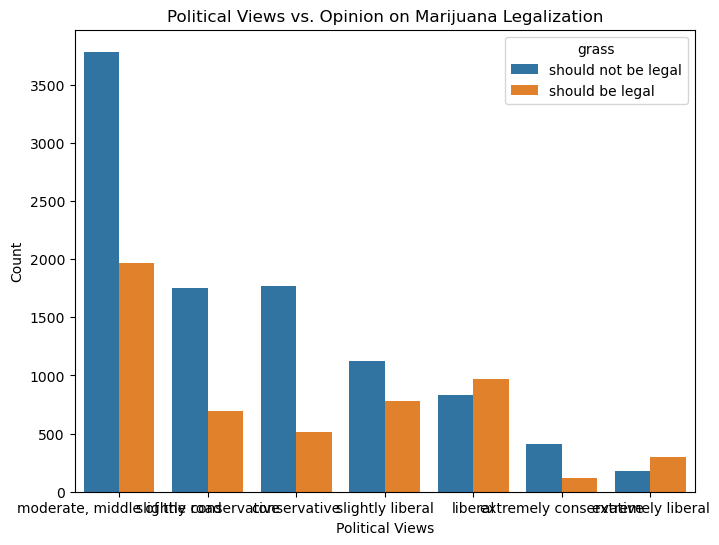

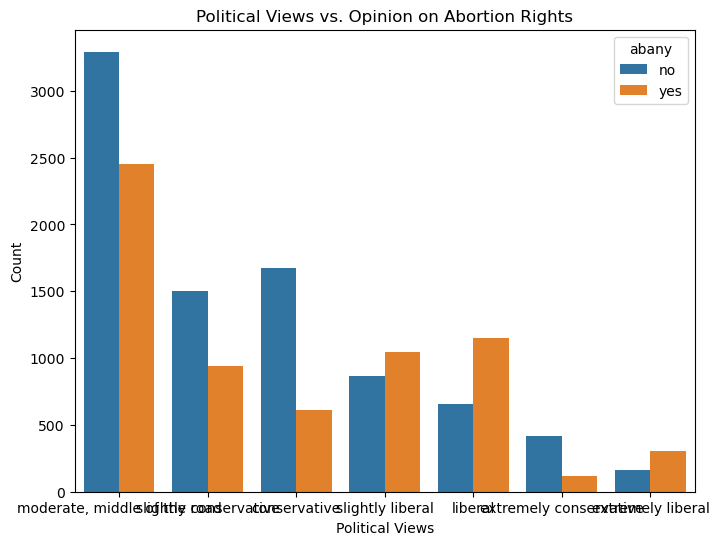

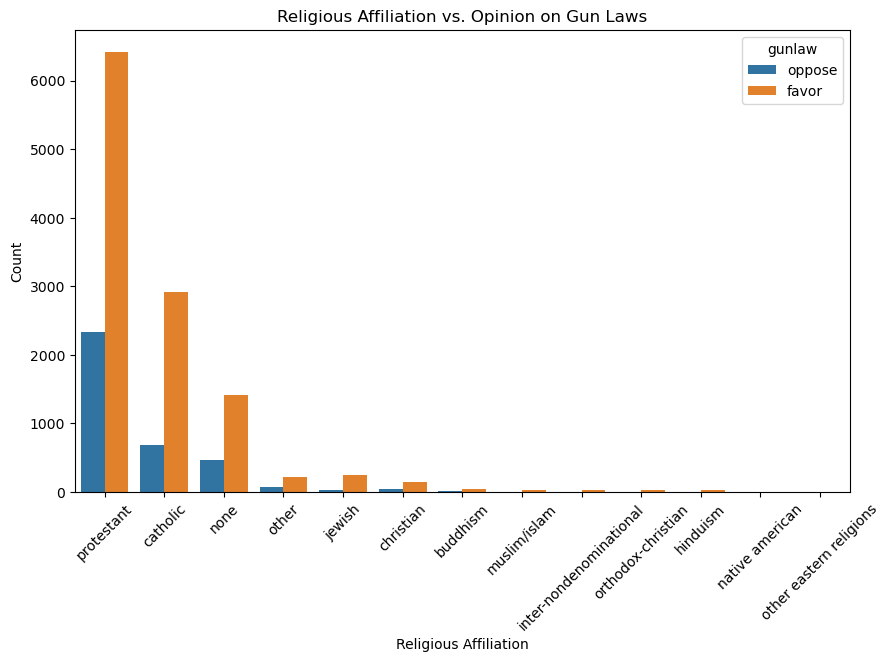

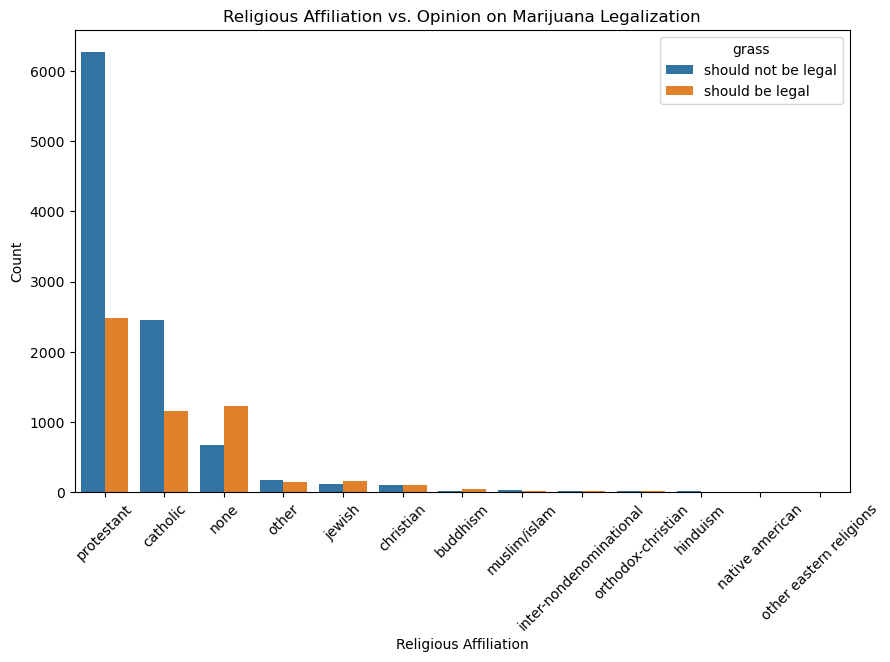

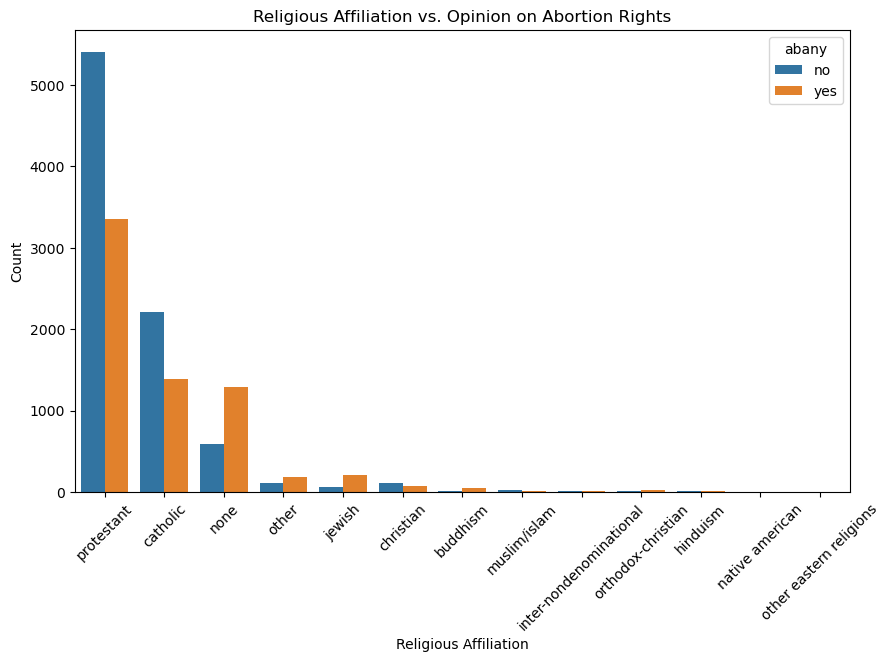

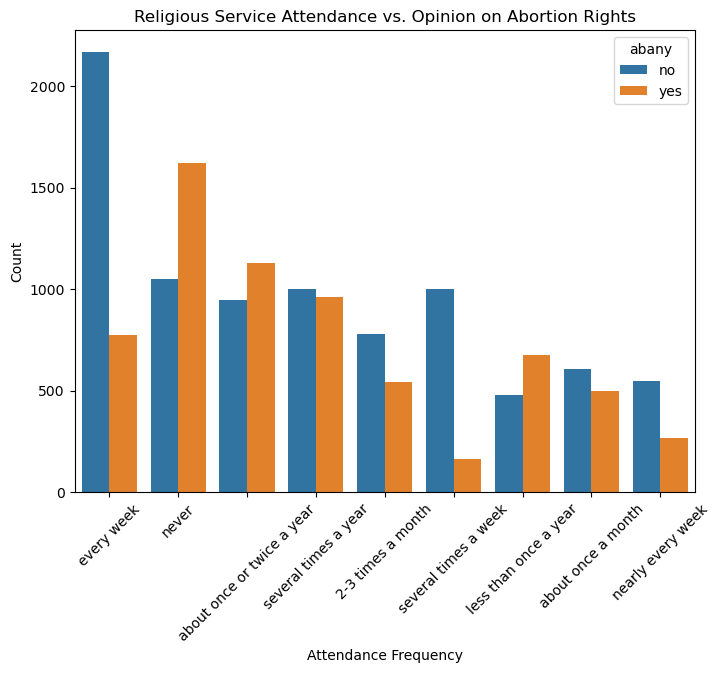

In [14]:
# Load the cleaned data
df_cleaned = pd.read_csv('cleaned_gss_data.csv')

# Cross-tabulations and visualizations for relationships between variables

# Political Views vs. Gun Law Opinions
plt.figure(figsize=(8, 6))
sns.countplot(x='polviews', hue='gunlaw', data=df_cleaned, order=df_cleaned['polviews'].value_counts().index)
plt.title('Political Views vs. Opinion on Gun Laws')
plt.xlabel('Political Views')
plt.ylabel('Count')
plt.show()

# Political Views vs. Marijuana Legalization
plt.figure(figsize=(8, 6))
sns.countplot(x='polviews', hue='grass', data=df_cleaned, order=df_cleaned['polviews'].value_counts().index)
plt.title('Political Views vs. Opinion on Marijuana Legalization')
plt.xlabel('Political Views')
plt.ylabel('Count')
plt.show()

# Political Views vs. Abortion Rights
plt.figure(figsize=(8, 6))
sns.countplot(x='polviews', hue='abany', data=df_cleaned, order=df_cleaned['polviews'].value_counts().index)
plt.title('Political Views vs. Opinion on Abortion Rights')
plt.xlabel('Political Views')
plt.ylabel('Count')
plt.show()

# Religious Affiliation vs. Gun Law Opinions
plt.figure(figsize=(10, 6))
sns.countplot(x='relig', hue='gunlaw', data=df_cleaned, order=df_cleaned['relig'].value_counts().index)
plt.title('Religious Affiliation vs. Opinion on Gun Laws')
plt.xlabel('Religious Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Religious Affiliation vs. Marijuana Legalization
plt.figure(figsize=(10, 6))
sns.countplot(x='relig', hue='grass', data=df_cleaned, order=df_cleaned['relig'].value_counts().index)
plt.title('Religious Affiliation vs. Opinion on Marijuana Legalization')
plt.xlabel('Religious Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Religious Affiliation vs. Abortion Rights
plt.figure(figsize=(10, 6))
sns.countplot(x='relig', hue='abany', data=df_cleaned, order=df_cleaned['relig'].value_counts().index)
plt.title('Religious Affiliation vs. Opinion on Abortion Rights')
plt.xlabel('Religious Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Religious Service Attendance vs. Abortion Rights
plt.figure(figsize=(8, 6))
sns.countplot(x='attend', hue='abany', data=df_cleaned, order=df_cleaned['attend'].value_counts().index)
plt.title('Religious Service Attendance vs. Opinion on Abortion Rights')
plt.xlabel('Attendance Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


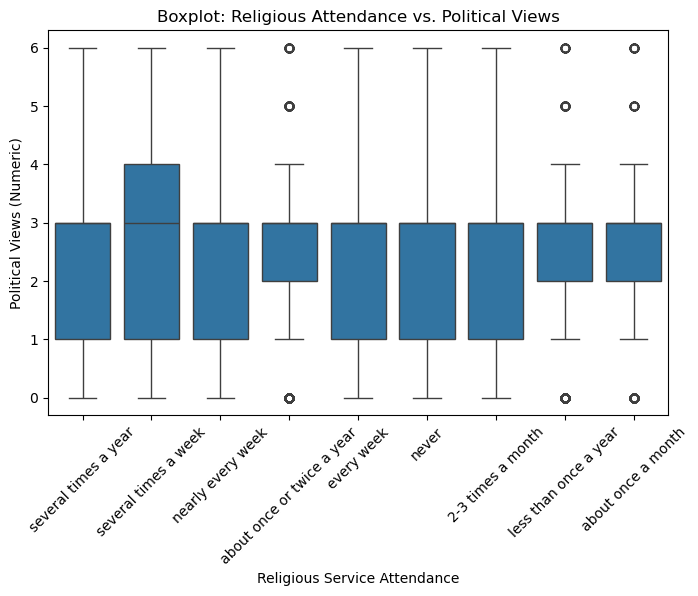

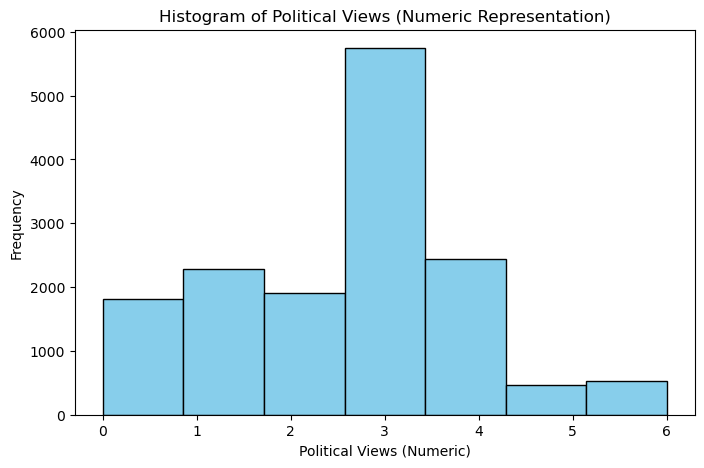

/var/folders/nd/r48_9n593wlg71hh29nd29100000gn/T/ipykernel_98199/2044474409.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_cleaned['polviews_num'], shade=True, color='purple')


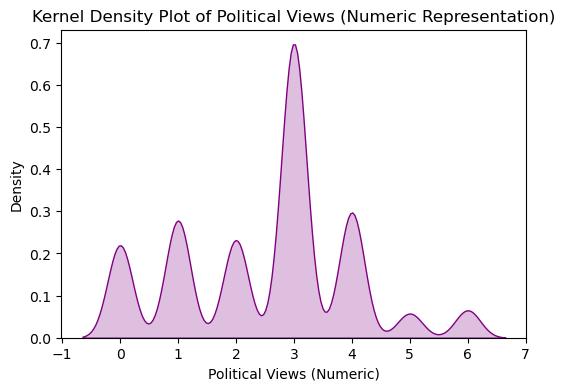

In [15]:
# Factorize categorical variables for numeric plots
df_cleaned['polviews_num'] = pd.factorize(df_cleaned['polviews'])[0]
df_cleaned['relig_num'] = pd.factorize(df_cleaned['relig'])[0]
df_cleaned['attend_num'] = pd.factorize(df_cleaned['attend'])[0]
df_cleaned['gunlaw_num'] = pd.factorize(df_cleaned['gunlaw'])[0]
df_cleaned['grass_num'] = pd.factorize(df_cleaned['grass'])[0]
df_cleaned['abany_num'] = pd.factorize(df_cleaned['abany'])[0]

# Boxplot: Political Views (numeric) vs. Religious Attendance
plt.figure(figsize=(8, 5))
sns.boxplot(x='attend', y='polviews_num', data=df_cleaned)
plt.title('Boxplot: Religious Attendance vs. Political Views')
plt.xlabel('Religious Service Attendance')
plt.ylabel('Political Views (Numeric)')
plt.xticks(rotation=45)
plt.show()

# Histogram: Political Views (Numeric Representation)
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['polviews_num'], bins=7, color='skyblue', edgecolor='black')
plt.title('Histogram of Political Views (Numeric Representation)')
plt.xlabel('Political Views (Numeric)')
plt.ylabel('Frequency')
plt.show()

# Kernel Density Plot: Political Views (Numeric Representation)
plt.figure(figsize=(6, 4))
sns.kdeplot(df_cleaned['polviews_num'], shade=True, color='purple')
plt.title('Kernel Density Plot of Political Views (Numeric Representation)')
plt.xlabel('Political Views (Numeric)')
plt.ylabel('Density')
plt.show()

After conducting a thorough exploratory data analysis (EDA) on the General Social Survey (GSS) data, which included political views, religious affiliation, religious attendance, and opinions on gun laws, marijuana legalization, and abortion, several significant patterns and relationships were uncovered.

Political Views vs. Gun Law Opinions:
The visualization indicated a clear relationship between political ideology and opinions on gun laws. Respondents identifying as more conservative were significantly more likely to oppose stricter gun laws, while liberal respondents showed stronger support for increased gun regulation. This aligns with the broader national debate, where conservatives generally advocate for gun rights and liberals push for stricter firearm legislation.

Political Views vs. Marijuana Legalization:
A similar pattern emerged when examining views on marijuana legalization. Conservative individuals tended to oppose legalization more often, whereas liberal and moderate respondents displayed greater support for legalizing marijuana. This finding is consistent with recent trends showing that support for marijuana reform is often higher among progressive and younger populations.

Political Views vs. Abortion Rights:
The relationship between political views and abortion rights followed a comparable trajectory. Conservative respondents were more inclined to oppose abortion under any circumstances, whereas liberal and moderate respondents expressed stronger support for reproductive rights. This polarization reflects the broader political landscape in the United States, where abortion legislation often becomes a key issue during elections.

Religious Affiliation vs. Gun Law Opinions:
Religious affiliation also exhibited a notable impact on gun law opinions. Protestants and other traditionally conservative religious groups showed less support for stricter gun regulations compared to individuals identifying with no religion or non-Christian groups. This highlights the intersection of religious identity and conservative values regarding gun ownership.

Religious Affiliation vs. Marijuana Legalization:
Religious groups, especially Protestants and Catholics, demonstrated more opposition to marijuana legalization compared to those with no religious affiliation. Respondents without a religious background appeared to favor marijuana legalization at a higher rate. This underscores the potential influence of religious teachings on attitudes toward drug policies.

Religious Affiliation vs. Abortion Rights:
The visual analysis revealed that individuals with stronger ties to organized religion, particularly Protestants and Catholics, were more likely to oppose abortion under any circumstances. Conversely, non-religious respondents or those from less traditional faiths were more supportive of reproductive rights.

Religious Service Attendance vs. Abortion Rights:
A deeper examination of religious attendance showed that individuals who frequently attended religious services were more likely to hold anti-abortion stances. Those who seldom or never attended services demonstrated greater support for abortion rights. This relationship highlights the role of regular religious participation in shaping moral and political beliefs.

Numeric Summaries and Distribution Patterns:
The boxplot of political views by religious attendance further confirmed that individuals who attend services regularly tend to lean more conservative. The histogram and kernel density plot of political views emphasized that the majority of respondents identified as moderate, with fewer individuals occupying the extremes of the political spectrum.

Overall Insights:
The analysis illustrates that both political ideology and religious commitment play pivotal roles in shaping public opinion on social issues such as gun laws, marijuana legalization, and abortion rights. Conservatives and individuals with strong religious affiliations tend to favor more traditional policies, while liberals and non-religious respondents lean toward more progressive stances. These findings are consistent with broader sociopolitical patterns in the United States and emphasize the importance of considering both political and religious contexts when examining public attitudes toward controversial issues.